# Chapter 1. 取得資料之後的第一件事
接著要學習執行程式的流程，以便學習機率、統計與機器學習的基礎。  

**注意：因為這個 Jupyter Notebook 是在 host 端操作，不是在 Colab，因此不需要使用註解掉的 `google.colab` 程式碼**

In [ ]:
#Colaboratory環境的設定 連結google drive
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
#切換目錄至範例程式碼的路徑下，你應將其改成你自己的路徑
# %cd /content/drive/MyDrive/Colab Notebooks/醫療決策分析/圖解機器學習與資料科學的數學基礎/Chapter1

## Section 1. 載入資料

> _對應作業要求： 1. 讀取並整理數據，確保所有欄位和日期都正確格式化_
>

### Step A. 首先要先讀取出資料

轉換為 `Datetimeindex` 的目的是方便按照時間進行資料處理

In [ ]:
import pandas as pd
df = pd.read_csv("accomodation_info.csv", index_col=0, parse_dates=[0])
df

,病人ID,病人姓名,科別,金額
日期,,,,
2018-11-01 00:02:21,110034,若松 花子,B,19000
2018-11-01 00:03:10,112804,津田 美加子,D,20000
2018-11-01 00:06:19,110275,吉本 美加子,D,20000
2018-11-01 00:08:41,110169,坂本 直人,B,19000
2018-11-01 00:12:22,111504,青山 零,A,15000
...,...,...,...,...
2020-10-31 23:38:51,110049,吉本 篤司,A,3000
2020-10-31 23:42:12,110127,喜嶋 浩,A,3000
2020-10-31 23:47:24,115464,藤本 明美,D,8000


### Step B. 查看 DataFrame 的摘要資訊

現在已經確保格式正確。載入資料後的第一件事情，就是要檢查資料的 **結構** 與 **類型**，以確認 pandas 所載入的 `*.csv` 檔案是否符合預期

In [ ]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71722 entries, 2018-11-01 00:02:21 to 2020-10-31 23:57:21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   病人ID    71722 non-null  int64 
 1   病人姓名    71722 non-null  object
 2   科別      71722 non-null  object
 3   金額      71722 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


以上資訊解析如下：

1. 可以看到資料型態 `dtype` 為：
   1. 整數（`int64`）包含「病人ID」與「金額」
   2. 物件（`object`）包含「病人姓名」 與「科別」，在 pandas 中的 string 型別通常都會寫為 object
2. 其中 `Non-null` 代表資料沒有存在空值，且總筆數 `71722` 與 `Datetimeindex` 的 `71722 entries` 相同，代表資料是乾淨的

### Step C. 計算統計量

確認資料的「格式」與「結構」之後，就要來解析資料的內容，也就是統計資訊，可以在分割資料之前先進行

#### C-0. 為保持命名統一，定義以下變數

| **描述** | **欄位名稱** |
| :--- | :--- |
| **病人ID** | pid |
| **病人姓名** | name |
| **科別** | department |
| **金額** | fee |

有關數字的統計量，包含
1. 集中趨勢：
   - 平均數（Mean）
   - 中位數（Median）
   - 眾數（Mode）

2. 離散趨勢：
   - 全距（Range）
   - 四分位距（IQR）
   - 變異數（Variance）
   - 標準差（SD）
   - 變異係數（CV）

#### C-1. 呼叫 method 處理統計量

In [ ]:
fee = df["金額"]

print("總金額：", fee.sum())
print("金額平均値：", fee.mean())
print("金額中位數：", fee.median())
print("金額最小值：", fee.min())
print("金額最大值：", fee.max())

總金額： 1170345000
金額平均値： 16317.796492010819
金額中位數： 19000.0
金額最小值： 3000
金額最大值： 22000


#### C-2. 呼叫 `.describe()` 方法

可以注意到如果呼叫的物件中使用 object 或 dictionary，輸出會分別是 純文字 或 表格：

In [ ]:
### 純文字輸出
# fee_stats = df["金額"].describe()

### 表格輸出
fee_stats = df[["金額"]].describe(exclude=[object])
fee_stats

,金額
count,71722.000000
mean,16317.796492
std,5231.612816
min,3000.000000
25%,15000.000000
50%,19000.000000
75%,20000.000000
max,22000.000000


如果使用 `.describe()` 則直接操作物件的索引標籤進行

注意：使用雙中括號 `[["金額"]]` 時，pandas 會回傳一個 **DataFrame（表格）**。在這個表格中，`"max"` 和 `"min"` 是**索引（index）** 標籤，而非**欄位（column）** 名稱。接著使用 `fee_stats["max"]` 時，pandas 嘗試尋找名為 `"max"` 的**欄位**，但找不到，因此產生 `KeyError`。

解決方法是使用 `.loc` 方法，這是專門根據索引標籤來選取**列（row）** 的功能。

In [ ]:
### 對應全文字輸出：
# fee_range = fee_stats["max"] - fee_stats["min"]

### 對應表格輸出，要只取出純粹的數值，需要在選取列（row）的同時，也指定要取出哪一個欄（column）的值
### 對應表格如下：
fee_range = fee_stats.loc["max", "金額"] - fee_stats.loc["min", "金額"]
fee_iqr = fee_stats.loc["75%", "金額"] - fee_stats.loc["25%", "金額"]
fee_variance = fee_stats.loc["std", "金額"] ** 2
fee_cv = fee_stats.loc["std", "金額"] / fee_stats.loc["min", "金額"]

print("金額全距：", fee_range)
print("金額四分位距：", fee_iqr)
print("金額變異數：", fee_variance)
print("金額變異係數：", fee_cv)

金額全距： 19000.0
金額四分位距： 5000.0
金額變異數： 27369772.65455896
金額變異係數： 1.7438709386037006


## Section 2. 資料分割

> _對應作業要求： 2. 將資料分成兩部分，分別為 疫情爆發前 與 疫情爆發後_
>

### Step A. 時間定義

作業將疫情爆發前後定義在 2020 年 3 月 1 日，若依照字面解釋
- 在 `2020/03/01 00:00:00` 之前定義為「疫情前」，為開區間（不包含 `2020/03/01 00:00:00`）
- 在 `2020/03/01 00:00:00` 定義為「疫情後」，為半開半閉區間（包含 `2020/03/01 00:00:00`）

因此可以定義兩個變數，分別是 `df_pre_pandemic` 存放「疫情前」的資料；而 `df_pandemic` 存放「疫情後」的資料

### Step B. 分割資料

這時候要回到前面的 `Datetimeindex`，由於日期已經被當成是索引，因此可以直接操作索引的比較與篩選機制。這裡會透過 boolean mask 的方法，也就是

1. `df.index < "2020-03-01"` 會逐一比較索引中的每個日期，產生一個由 `True`（符合條件）和 `False`（不符合條件）組成的序列
2. 將這個序列放回 `df[...]` 中，pandas 就只會篩選出所有標記為 `True` 的列

In [ ]:
df_pre_pandemic = df[df.index < "2020-03-01"]
df_pandemic = df[df.index >= "2020-03-01"]

print("df_pre_pandemic: \n", df_pre_pandemic)
print("\n" *2)
print("df_pandemic: \n", df_pandemic)

df_pre_pandemic: 
                        病人ID    病人姓名 科別     金額
日期                                           
2018-11-01 00:02:21  110034   若松 花子  B  19000
2018-11-01 00:03:10  112804  津田 美加子  D  20000
2018-11-01 00:06:19  110275  吉本 美加子  D  20000
2018-11-01 00:08:41  110169   坂本 直人  B  19000
2018-11-01 00:12:22  111504    青山 零  A  15000
...                     ...     ... ..    ...
2020-02-29 23:49:54  111270  中津川 里佳  C  19000
2020-02-29 23:52:14  112251   田中 真綾  B  19000
2020-02-29 23:52:51  115804   井高 真綾  D  20000
2020-02-29 23:53:09  112928   石田 修平  D  20000
2020-02-29 23:55:28  110504   田辺 京助  B  19000

[58326 rows x 4 columns]



df_pandemic: 
                        病人ID    病人姓名 科別    金額
日期                                          
2020-03-01 00:07:10  113962   野村 和也  C  7000
2020-03-01 00:15:35  114926  小林 さゆり  C  7000
2020-03-01 00:43:34  110162   佐々木 幹  C  7000
2020-03-01 00:55:40  110084    加藤 治  A  3000
2020-03-01 15:04:34  110148   小泉 涼平  C  7000
...                     

### Step C. 用 if-statement 做準確判斷

有時候直接印出資料檢查，不一定準確，可以透過判斷式進行檢查

1. 檢查 `df_pre_pandemic`（小於 `2020-03-01`）的**最大**日期
2. 檢查 `df_pandemic`（大於等於 `2020-03-01`）的**最小**日期
3. 檢查兩個子集是否包含了原始資料框 `df` 的所有行數，以確認沒有遺漏

In [ ]:
split_date = pd.to_datetime("2020-03-01")

check_df_pre_pandemic = df_pre_pandemic.index.max() < split_date
check_df_pandemic = df_pandemic.index.min() >= split_date

check_total_rows = len(df_pre_pandemic) + len(df_pandemic) == len(df)

if check_df_pre_pandemic and check_df_pandemic and check_total_rows:
    print("Correct")
else:
    print("Error")

Correct


## Section 3. 進行其他統計

> _對應作業要求： 3. 計算每位病患在這兩個時期的累積住院次數和總病房金額_
>

### Step A. 資料聚合

要處理題目要求，這時候就要做資料聚合。如果先處理 `df_pre_pandemic` 的 DataFrame，可以使用以下方法將資料進行分組

順序是：先將資料用 `.groupby()` 進行分類，隨後用 `.agg()` 聚合在一起

#### A-1. 處理疫情前資料

In [ ]:
summary_pre_pandemic = df_pre_pandemic.groupby(
    ["病人ID", "病人姓名"], as_index=False
).agg(sum = ("金額", "sum"), count = ("病人ID", "count"))

print("summary_pre_pandemic\n", summary_pre_pandemic)


summary_pre_pandemic
         病人ID    病人姓名      sum  count
0     109988  浜田 くみ子  1106000     57
1     109989   三宅 香織   750000     39
2     109990   宇野 加奈   686000     36
3     109991   津田 桃子   808000     42
4     109992  佐々木 花子   733000     38
...      ...     ...      ...    ...
5415  116499   加納 七夏    80000      4
5416  116500    渡辺 治   107000      6
5417  116501  中島 裕美子    38000      2
5418  116504   藤本 里佳   184000     10
5419  116508  藤本 くみ子    35000      2

[5420 rows x 4 columns]


#### A-2. 處理疫情後資料

In [ ]:
summary_pandemic = df_pandemic.groupby(
    ["病人ID", "病人姓名"], as_index=False
).agg(sum=("金額", "sum"), count=("病人ID", "count"))

print("summary_pre_pandemic\n", summary_pandemic)

summary_pre_pandemic
         病人ID    病人姓名     sum  count
0     109988  浜田 くみ子  128000     27
1     109989   三宅 香織  123000     22
2     109990   宇野 加奈  190000     34
3     109991   津田 桃子  166000     28
4     109992  佐々木 花子  331000     61
...      ...     ...     ...    ...
3284  116495   野村 翔太    8000      1
3285  116496  江古田 直樹    7000      1
3286  116498   小林 京助    8000      1
3287  116500    渡辺 治    7000      1
3288  116504   藤本 里佳    8000      1

[3289 rows x 4 columns]


可以注意到出現的 rows 數量跟原始資料的 71722 rows 有出入，這是因為 `groupby` 的作用是將多筆紀錄（如住院次數）壓縮成一筆摘要紀（每位病患的統計）

所以：
- `summary_pre_pandemic` 的 5420 筆，代表在疫情前，有 5420 位不重複的病患。
- `summary_pandemic` 的 3289 筆，代表在疫情後，有 3289 位不重複的病患。

這兩個數字加總不等於原始筆數，是因為現在看的是 **病患數**，而不是**就診次數**。有些病患可能只在疫情前看診，有些只在疫情後，而有些則是前後都有

### Step B. 資料合併

為了比較同一個病患在前後的變化，所以需要將這兩份摘要表合併（Merge）起來。定義 `sum` 和 `count` 欄位為：
- 疫情前 `summary_pre_pandemic` 會變成 `sum_before` 和 `count_before`
- 疫情後 `summary_pandemic` 會變成 `sum_after` 和 `count_after`

In [ ]:
merged_summary = pd.merge(
    summary_pre_pandemic,
    summary_pandemic,
    how="outer",
    on=["病人ID", "病人姓名"],
    suffixes=("_before", "_after"),
)

print(merged_summary)

        病人ID    病人姓名  sum_before  count_before  sum_after  count_after
0     109988  浜田 くみ子   1106000.0          57.0   128000.0         27.0
1     109989   三宅 香織    750000.0          39.0   123000.0         22.0
2     109990   宇野 加奈    686000.0          36.0   190000.0         34.0
3     109991   津田 桃子    808000.0          42.0   166000.0         28.0
4     109992  佐々木 花子    733000.0          38.0   331000.0         61.0
...      ...     ...         ...           ...        ...          ...
5481  116499   加納 七夏     80000.0           4.0        NaN          NaN
5482  116500    渡辺 治    107000.0           6.0     7000.0          1.0
5483  116501  中島 裕美子     38000.0           2.0        NaN          NaN
5484  116504   藤本 里佳    184000.0          10.0     8000.0          1.0
5485  116508  藤本 くみ子     35000.0           2.0        NaN          NaN

[5486 rows x 6 columns]


其中
1. `how="outer"` 是必須的，因為 `outer` join 會保留所有在任一表中出現過的鍵值。如果某鍵值只在其中一個表出現，另一個時間段的數據會顯示為 `NaN`。這樣原則上就不會遺漏任何資料
2. `on=["病人ID", "病人姓名"]` 是明確指定用這兩個欄位作為合併的基準
3. `suffixes=("_before", "_after")` 是解決欄位名稱衝突的問題。在合併後，欄位會變成 `sum_before`、`count_before` 和 `sum_after`、`count_after`，閱讀語意上會比較清楚

### C. 處理空值

現在這些 `NaN` 值需要依照性質處理。根據資料表推論，`sum_after` 與 `count_after` 在性質上可以這樣思考：
> 疫情後沒有就診，自然是 0 次，也因此沒有金額，屬於 0 元

所以可以用 0 填補所有空缺

In [ ]:
merged_summary = merged_summary.fillna(0)
print("new merged_summary\n", merged_summary)

new merged_summary
         病人ID    病人姓名  sum_before  count_before  sum_after  count_after
0     109988  浜田 くみ子   1106000.0          57.0   128000.0         27.0
1     109989   三宅 香織    750000.0          39.0   123000.0         22.0
2     109990   宇野 加奈    686000.0          36.0   190000.0         34.0
3     109991   津田 桃子    808000.0          42.0   166000.0         28.0
4     109992  佐々木 花子    733000.0          38.0   331000.0         61.0
...      ...     ...         ...           ...        ...          ...
5481  116499   加納 七夏     80000.0           4.0        0.0          0.0
5482  116500    渡辺 治    107000.0           6.0     7000.0          1.0
5483  116501  中島 裕美子     38000.0           2.0        0.0          0.0
5484  116504   藤本 里佳    184000.0          10.0     8000.0          1.0
5485  116508  藤本 くみ子     35000.0           2.0        0.0          0.0

[5486 rows x 6 columns]


## Section 4. 資料視覺化

> _對應作業要求： 4. 將每位病患的累積住院次數進行視覺化，並比較疫情前後的變化_
>
> _對應作業要求： 6. 依照不同科別，分別各科別的就診情況，觀察不同科別病患的住院行為，在疫情前後的差異為何_
>

### Step A. 處理變化量（要求 4）

因為接下來要將資料做視覺化，可以觀察到原先 `merged_summary` 中並沒有 `sum` 與 `count` 的前後變化量的比較，因此需要插入這兩個變化量的 column

定義變化量分別為 `delta_sum` 與 `delta_count`，可以用以下方式合併：

In [ ]:
merged_summary["delta_sum"] = (
    merged_summary["sum_after"] - merged_summary["sum_before"]
)

merged_summary["delta_count"] = (
    merged_summary["count_after"] - merged_summary["count_before"]
)
print("New merged_summary\n", merged_summary)

New merged_summary
         病人ID    病人姓名  sum_before  count_before  sum_after  count_after  \
0     109988  浜田 くみ子   1106000.0          57.0   128000.0         27.0   
1     109989   三宅 香織    750000.0          39.0   123000.0         22.0   
2     109990   宇野 加奈    686000.0          36.0   190000.0         34.0   
3     109991   津田 桃子    808000.0          42.0   166000.0         28.0   
4     109992  佐々木 花子    733000.0          38.0   331000.0         61.0   
...      ...     ...         ...           ...        ...          ...   
5481  116499   加納 七夏     80000.0           4.0        0.0          0.0   
5482  116500    渡辺 治    107000.0           6.0     7000.0          1.0   
5483  116501  中島 裕美子     38000.0           2.0        0.0          0.0   
5484  116504   藤本 里佳    184000.0          10.0     8000.0          1.0   
5485  116508  藤本 くみ子     35000.0           2.0        0.0          0.0   

      delta_sum  delta_count  
0     -978000.0        -30.0  
1     -627000.0        -17.0 

### Step B. 資料視覺化（要求 4）

#### B-1. 針對資料

可以觀察到以上有 5000 多筆資料，理論上直接輸出這些資訊在同一張圖上，會導致圖表完全無法閱讀。但可以看到資料集肯定會有「變化最顯著」的一些病患。因此思考點可以是：
1. 哪些病患的就診次數減少最多？
2. 哪些病患增加最多？
3. 這些病患前後的具體就診次數是多少？

既然要找極端值，那就選出就診次數減少最多的前 10 位 `top_decrease`、以及增加最多的前 10 位病患 `top_decrease` 的 subset，隨後將 `top_decrease` 與 `top_increase` 資料表進行接合（concat）以進行比較

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
# 用升冪排序（Ascending）
top_decrease = merged_summary.sort_values(by="delta_count", ascending=True).head(N)
# 用降冪排序（Descending）
top_increase = merged_summary.sort_values(by="delta_count", ascending=False).head(N)
plot_data = pd.concat([top_decrease, top_increase])

檢視一下排序後的資料

In [ ]:
print(
    "top_decrease\n",
    top_decrease[["病人ID", "病人姓名", "count_before", "count_after"]]
)
print("\n\n")
print(
    "top_increase\n",
    top_increase[["病人ID", "病人姓名", "count_before", "count_after"]],
)

top_decrease
        病人ID   病人姓名  count_before  count_after
402  110390   杉山 舞          90.0          6.0
549  110537  鈴木 太一          88.0          9.0
435  110423  若松 直子          81.0          8.0
322  110310  山岸 七夏          79.0          9.0
647  110635  田中 健一          80.0         10.0
698  110686  石田 智也          76.0          8.0
559  110547  加藤 桃子          79.0         11.0
281  110269  三宅 香織          77.0         10.0
475  110463   杉山 学          83.0         16.0
246  110234  木村 和也          72.0          6.0



top_increase
        病人ID    病人姓名  count_before  count_after
51   110039    井上 晃          31.0         82.0
140  110128   高橋 健一          27.0         71.0
8    109996   山本 知実          36.0         76.0
32   110020   近藤 花子          27.0         53.0
100  110088  中津川 七夏          29.0         54.0
26   110014   井高 裕樹          23.0         46.0
4    109992  佐々木 花子          38.0         61.0
55   110043  斉藤 あすか          65.0         88.0
95   110083  江古田 太郎          33.0       

隨後就是設定圖表了，為了避免中文，因此取 PID 作為 X 軸資料。這時候上面輸出的表格就可以進行參照

因為資料分爲兩個 subset，因此需要針對「疫情前」與「疫情後」進行折線繪製出「病患就診次數變化的折線圖」

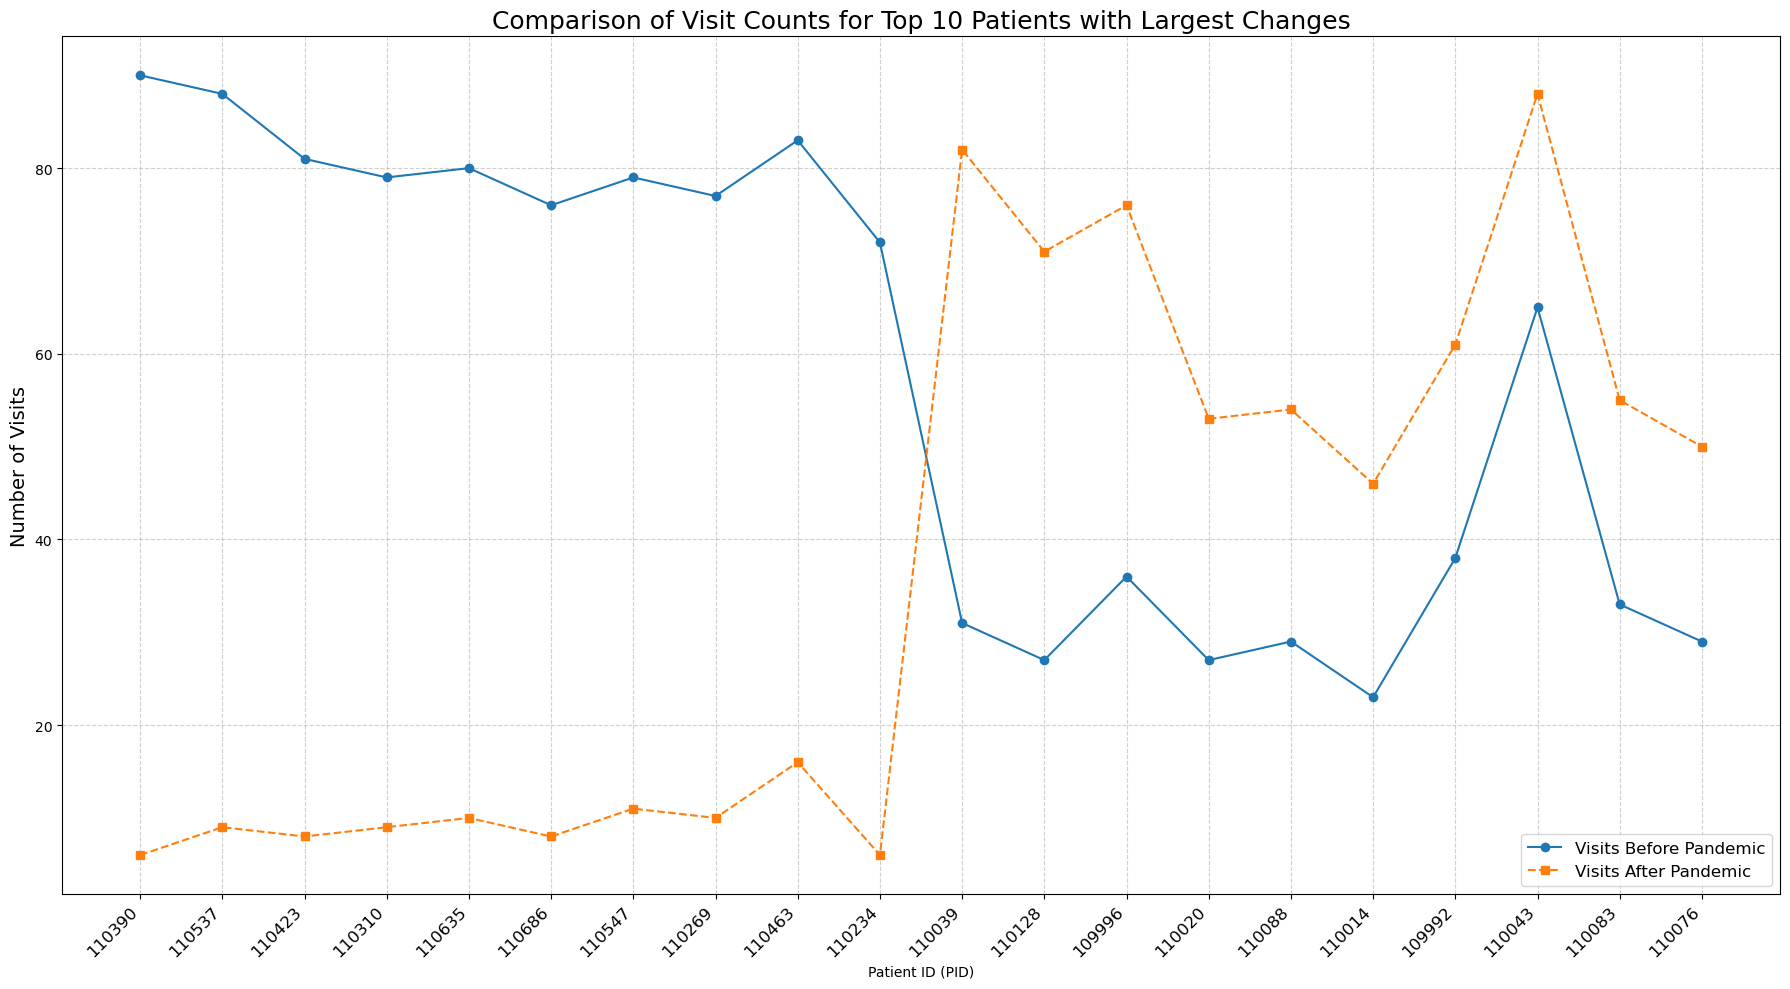

In [ ]:
plt.figure(figsize=(18, 10))

# 病患就診次數變化的折線圖
plt.title(
    f"Comparison of 要了解病患都去哪些科別，第一步通常是計算各個科別出現的總次數Visit Counts for Top {N} Patients with Largest Changes",
    fontsize=18,
)
x_labels = plot_data["病人ID"]
x_pos = np.arange(len(x_labels))

plt.plot(
    x_pos,
    plot_data["count_before"],
    marker="o",
    linestyle="-",
    label="Visits Before Pandemic",
)

plt.plot(
    x_pos,
    plot_data["count_after"],
    marker="s",
    linestyle="--",
    label="Visits After Pandemic",
)

plt.xlabel("Patient ID (PID)")
plt.ylabel("Number of Visits", fontsize=14)
plt.xticks(x_pos, x_labels, rotation=45, ha="right", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()


#### B-2. 針對分佈趨勢

如果要觀察 `delta_count` 這個欄位中數值的分布情況，例如有多少病患的就診次數是增加的、多少是減少的、減少或增加的幅度...等，會有對應的圖表進行呈現

一般來說，針對 **單一變數** 的數值分佈且時間為連續時，一個可行方向是使用 **直方圖（Histogram）**

(min, max) = (-84.0, 51.0)


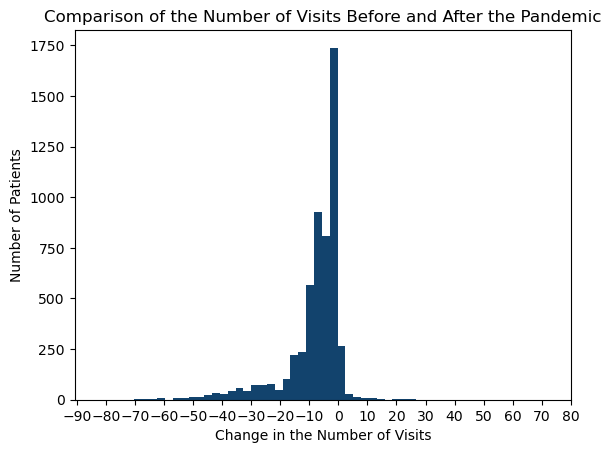

In [ ]:
x = merged_summary["delta_count"]
print(f"(min, max) = ({x.min()}, {x.max()})")

x_hist, t_hist, _ = plt.hist(x, 50, color="#12436D")
plt.title(
    "Comparison of the Number of Visits Before and After the Pandemic",
    fontsize=12,
)
plt.xlabel("Change in the Number of Visits")
plt.ylabel("Number of Patients")
plt.xticks(np.arange(-90, 90, 10))
plt.show()

這張圖是在回答這個問題：「有多少病患，他們的就診次數變化量是 `X`？」

- X 軸：代表 **就診次數的變化量** `delta_count`
   - `0` 代表疫情前後就診次數不變。
   - 負數 (例如 `-20`) 代表疫情後的就診次數比疫情前減少了 20 次
   - 正數 (例如 `10`) 代表疫情後的就診次數比疫情前增加了 10 次
- Y 軸：代表 **病患的人數**

每一條長條的高度，表示有多少位病患的就診次數變化量，剛好落在該區間內

### Step C. 更具敘述性的統計資訊（要求 4）

直方圖只給出視覺上的故事：「大多數病患的就診次數是下降的。」然而，可以計算一些關鍵的統計數字來量化這個觀察，可以透過描述集中趨勢的參數，如平均值與中位數等，以便知道集中趨勢在哪裡

In [ ]:
print("疫情前就診次數平均値：", merged_summary["count_before"].mean())
print("疫情前就診次數中位數：", merged_summary["count_before"].median())
print("疫情後就診次數平均値：", merged_summary["count_after"].mean())
print("疫情後就診次數中位數：", merged_summary["count_after"].median())
print()
print("疫情前就診金額平均値：", merged_summary["sum_before"].mean())
print("疫情前就診金額中位數：", merged_summary["sum_before"].median())
print("疫情後就診金額平均値：", merged_summary["sum_after"].mean())
print("疫情後就診金額中位數：", merged_summary["sum_after"].median())

疫情前就診次數平均値： 10.63179001093693
疫情前就診次數中位數： 6.0
疫情後就診次數平均値： 2.4418519868756836
疫情後就診次數中位數： 1.0

疫情前就診金額平均値： 198356.36164783084
疫情前就診金額中位數： 115000.0
疫情後就診金額平均値： 14976.667881881152
疫情後就診金額中位數： 7000.0


可以從這些數據搭配圖表給出敘述型統計：

- **就診次數**：病患的 **平均** 就診次數從 10.6 次驟降至 2.4 次，**中位數** 也從 6 次降至 1 次。
- **就診金額**：病患的 **平均** 花費從約 198,000 元降至約 15,000 元，**中位數** 也從 115,000 元大幅降至 7,000 元。

因此疫情的發生，對病患的就診頻率與醫療花費產生了**普遍且顯著的抑制效果**

同時在所有時期（無論疫情前後、次數或金額），**平均值 (mean) 都遠大於中位數 (median)**，代表數據是 **right-skewed** 分布。換句話說，大部分病患的就診次數和金額，其實是比較低的（集中在中位數附近）。但數據中存在一小部分在 outlier 的病患，例如住院天數特別長、自費項目特別多，是這些極少數的個案，將整體的平均值提高

因此可以結論出：

> 數據顯示疫情顯著降低病患的就診行為，除了整體平均數以外，在代表「典型病患」的中位數的下降趨勢更明顯；
> 從平均值遠高於中位數的現象可以看出，無論疫情前後，醫院的主要收入來源，都可能高度依賴一小部分高就診次數的病患帶來的高額消費

### Step D. 新增要求 6 所需欄位

根據題幹：「依照不同科別，分別各科別的就診情況，觀察不同科別病患的住院行為，在疫情前後的差異為何」。因為 `merged_summary` 不包含「科別」，因此要回到原始資料進行操作

In [ ]:
df["period"] = np.where(df.index < split_date, "before", "after")

因為要呈現「科別」和「疫情前後」這兩個變數之間的關係，可以透過 **交叉列表（cross tabulation）** 呈現，要先在 pandas 利用 `pd.crosstab()` 進行預先處理

In [ ]:
department_summary = pd.crosstab(df["科別"], df["period"])
department_summary = department_summary[["before", "after"]]

print("各科別疫情前後就診次數統計表：\n", department_summary)

各科別疫情前後就診次數統計表：
 period  before  after
科別                   
A         8869   4085
B        20148   2576
C         9048   4182
D        20261   2553


隨後就可以做視覺化了，直接對 `crosstab` 的結果繪製長條圖。其餘操作方式可以參考前例的說明進行類比

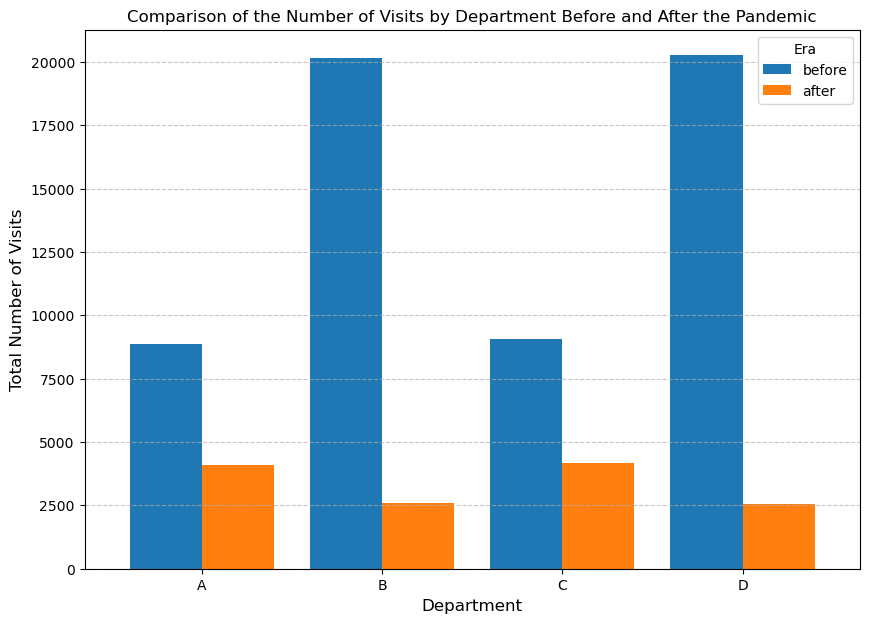

In [ ]:
department_summary.plot(kind="bar", figsize=(10, 7), width=0.8)

# 比較疫情前後不同科別的就診次數變化圖
plt.title(
    "Comparison of the Number of Visits by Department Before and After the Pandemic",
    fontsize=12,
)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Total Number of Visits", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Era")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Section 5. 輸出分析結果

> _對應作業要求：5. 將分析結果輸出，包含每位病患的姓名、病患ID、疫情前後的累積住院次數和金額_
>

先前建立的 `merged_summary` DataFrame 已經包含了要求中需要的所有欄位，因此現在可以輸出為一個 `*.csv` 檔案

In [ ]:
# 輸出每位病患累積的醫療費用數據表
output_file = "merged_summary.csv"
merged_summary.to_csv(output_file, index=False, encoding="utf-8-sig")

## Appendix. 在 Matplotlib 圖表內輸出中文字體

`matplotlib` 預設的字型並不是中文字型，且不會預設引入文字。因此使用中文做 label 時會出現方匡：

(min, max) = (-84.0, 51.0)


/Users/chingsanning/miniconda3/envs/conda-ML/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23601 (\N{CJK UNIFIED IDEOGRAPH-5C31}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chingsanning/miniconda3/envs/conda-ML/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35386 (\N{CJK UNIFIED IDEOGRAPH-8A3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chingsanning/miniconda3/envs/conda-ML/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chingsanning/miniconda3/envs/conda-ML/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/chingsanning/miniconda3/envs/cond

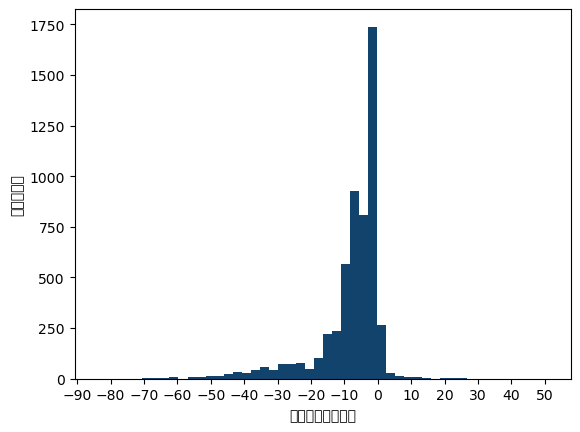

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = merged_summary["delta_count"]
print(f"(min, max) = ({x.min()}, {x.max()})")

x_hist, t_hist, _ = plt.hist(x, 50, color="#12436D")
plt.xlabel("就診次數的變化量")
plt.ylabel("病患的人數")
plt.xticks(np.arange(-90, 60, 10))
plt.show()


因此可以引用套件抓出系統的中文字型：

In [ ]:
import matplotlib.font_manager as fontManager

chinese_font_keywords = [
    "CJK",
    "PingFang",
    "Heiti",
    "Kaiti",
    "Song",
    "STHeiti",
    "MingLiU",
    "SimHei",
    "標楷體",
]
found_chinese_fonts = []

for font_name in sorted(fontManager.get_font_names()):
    if any(keyword.lower() in font_name.lower() for keyword in chinese_font_keywords):
        found_chinese_fonts.append(font_name)

print("=== Found Chinese Font ===\n")
for font in found_chinese_fonts:
    print(font)


=== Found Chinese Font ===

.CJK Symbols Fallback HK
Heiti TC
Kaiti SC
LiSong Pro
Noto Serif CJK JP
PingFang HK
STFangsong
STHeiti
SimSong
Songti SC


接下來就是透過 `plt.rcParams` 加入字體，就可以正常顯示中文字了

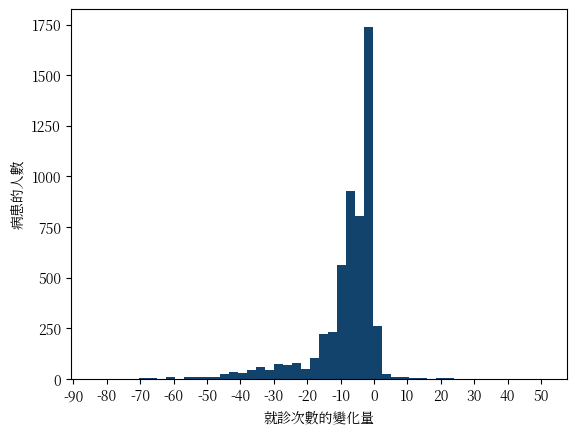

In [ ]:
x = merged_summary["delta_count"]
x_hist, t_hist, _ = plt.hist(x, 50, color="#12436D")

plt.rcParams["font.sans-serif"] = ["Noto Serif CJK JP"]
plt.rcParams["axes.unicode_minus"] = False
plt.xlabel("就診次數的變化量")
plt.ylabel("病患的人數")
plt.xticks(np.arange(-90, 60, 10))
plt.show()


### === 以上是作業參考解答 ===